# How can a wellness company play it smart?

### About the Project?
Today I'm going to analyze data of Bellabeat, a high-tech manufacturer of health-focused products for women. I followed total six steps: Ask, Prepare, Process, Analyze, Share & Act in following analysis. I used Python to analyze data and spreadsheet program (Microsoft Excel) to visualize data.

### About Bellabeat?
Well, Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

### Business Tasks
I will try to answer these questions:
 - What are some trends in smart device usage?
 - How could these trends apply to Bellabeat customers?
 - How could these trends help influence Bellabeat marketing strategy

<a id="0"></a> <br>
 # Table of Contents  
1. [Gathering the data](#1)     
1. [ Accessing the data](#2) 
    1. [Observation](#3) 
1. [Data Cleaning](#4)      
1. [Exploratory Data Analysis](#5)     
    1. [Do users get off their beds quickly?](#6)     
    1. [What Time of the Day are Users the most active?](#7)     
    1. [What is the relationship between the calories and total steps?](#8)     
    1. [Which day of the week are users the most active?](#9) 
    1. [ How do users spend their time?](#10)
    1. [Which BMI class covers the most distance and steps?](#11)       
1. [Insights for Marketing Strategy](#12)    
1. [Conclusion](#13)
    
       

<a id='1'></a>
## Gathering the data

In [90]:
# Loading the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [91]:
# The required datasets
dailyactivities = pd.read_csv('C:\\Users\\HP\\Downloads\\archive (1)\\dailyActivity_merged.csv')
dailyintensity = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (1)\\dailyIntensities_merged.csv")
dailycalories = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (1)\\dailyCalories_merged.csv")
sleepday = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (1)\\sleepDay_merged.csv")
weightlog = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (1)\\weightLogInfo_merged.csv")
heartrates = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (1)\\heartrate_seconds_merged.csv")

In [92]:
# Checking the datasets
weightlog.head()


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


<a id='2'></a> 
## Accessing the data

In [93]:
weightlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [94]:
heartrates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [95]:
heartrates.describe()

,Id,Value
count,2.483658e+06,2.483658e+06
mean,5.513765e+09,7.732842e+01
std,1.950224e+09,1.940450e+01
min,2.022484e+09,3.600000e+01
25%,4.388162e+09,6.300000e+01
50%,5.553957e+09,7.300000e+01
75%,6.962181e+09,8.800000e+01
max,8.877689e+09,2.030000e+02


In [96]:
dailyactivities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [97]:
dailyintensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [98]:
# Checking for null values 
dailyactivities.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [99]:
dailyintensity.isnull().sum()

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

In [100]:
sleepday.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [101]:
# Seems the SleepDay column has a constant time so the time will be removed since it wont be useful
sleepday.SleepDay.sample(20)

4      4/17/2016 12:00:00 AM
68     4/15/2016 12:00:00 AM
237    4/21/2016 12:00:00 AM
335    5/11/2016 12:00:00 AM
191     5/9/2016 12:00:00 AM
299     5/6/2016 12:00:00 AM
152    4/24/2016 12:00:00 AM
99     4/30/2016 12:00:00 AM
81     4/12/2016 12:00:00 AM
134     5/2/2016 12:00:00 AM
382    4/27/2016 12:00:00 AM
114     5/6/2016 12:00:00 AM
38     4/13/2016 12:00:00 AM
390     5/5/2016 12:00:00 AM
251     5/5/2016 12:00:00 AM
158     5/2/2016 12:00:00 AM
60      5/8/2016 12:00:00 AM
28      5/8/2016 12:00:00 AM
235    4/19/2016 12:00:00 AM
89     4/20/2016 12:00:00 AM
Name: SleepDay, dtype: object

<a id='3'></a> 
### Observation
Due to accessing the data in both the spreadsheet program and the jupyter notebook the following were observed;
- Remove the time in the SleepDay column
- Rename the SleepDay column to something more relevant
- Create a new column called 'Timeusedtogetup' in the sleepday dataset
- Merge the datasets that require merging

<a id='4'></a> 
## Data Cleaning

#### Removing the time part in the SleepDay column

In [102]:
# The use of string slicing to remove the time in the SleepDay column
sleepday.SleepDay = sleepday.SleepDay.str[:9]

In [233]:
sleepday.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeUsedToGetUp
0,1503960366,4/12/2016,1,327,346,19
1,1503960366,4/13/2016,2,384,407,23
2,1503960366,4/15/2016,1,412,442,30
3,1503960366,4/16/2016,2,340,367,27
4,1503960366,4/17/2016,1,700,712,12


#### Renaming the SleepDay column

In [104]:
# Renaming the column date 
sleepday = sleepday.rename(columns={'SleepDay':'Date'})

In [105]:
sleepday.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,1,327,346
1,1503960366,4/13/2016,2,384,407
2,1503960366,4/15/2016,1,412,442
3,1503960366,4/16/2016,2,340,367
4,1503960366,4/17/2016,1,700,712


#### Deriving the time used to get up from 2 pre-existing columns

In [106]:
sleepday['TimeUsedToGetUp'] = sleepday['TotalTimeInBed'] - sleepday['TotalMinutesAsleep']

In [107]:
sleepday.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeUsedToGetUp
0,1503960366,4/12/2016,1,327,346,19
1,1503960366,4/13/2016,2,384,407,23
2,1503960366,4/15/2016,1,412,442,30
3,1503960366,4/16/2016,2,340,367,27
4,1503960366,4/17/2016,1,700,712,12


<a id='5'></a> 
## Exploratory Data Analysis

<a id='6'></a> 
#### Do users get off their beds quickly?

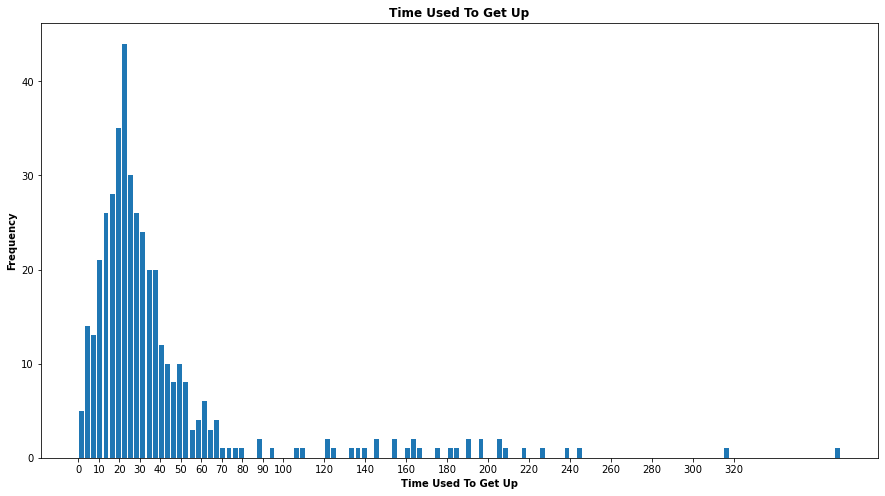

In [108]:
plt.figure(figsize=[15,8])
bins=np.arange(0,sleepday['TimeUsedToGetUp'].max()+3,3)
ticks = [0,10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,220,240,260,280,300,320]
labels=['{}'.format(v) for v in ticks]

plt.hist(data=sleepday,x='TimeUsedToGetUp',bins=bins,rwidth=0.8)
plt.title('Time Used To Get Up',y=1 ,fontweight = 'bold')
plt.xlabel('Time Used To Get Up',fontweight = 'bold')
plt.ylabel('Frequency',fontweight = 'bold')
plt.xticks(ticks,labels);

The distribution is right skewed hinting that the users are generally fast in getting off their beds 

<a id='7'></a> 
#### What Time of the Day are Users the most active?

In [109]:
hours = pd.to_datetime(heartrates['Time']).dt.strftime('%H')
heartrates['Hour']=hours


In [136]:
hourvsvalue=heartrates.groupby('Hour').Value.mean()
hourvsvalue


Hour
00    66.723642
01    65.642436
02    63.566506
03    61.143456
04    60.231779
05    63.178442
06    72.910595
07    75.196996
08    76.951884
09    80.703932
10    80.116789
11    79.147566
12    83.566121
13    81.041155
14    82.090328
15    79.366156
16    83.914978
17    84.810547
18    86.128509
19    82.797117
20    78.967916
21    75.127449
22    72.228438
23    69.272406
Name: Value, dtype: float64

In [133]:
heartrates = heartrates.sort_values('Hour')

Text(0.5, 1.0, 'Daily Activity')

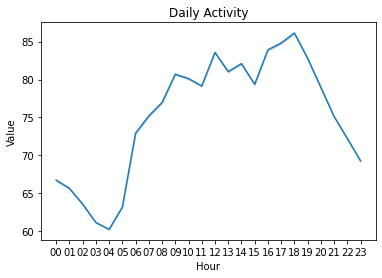

In [235]:
# A lineplot to show the heartrate of user in relation to the time of the day
sb.lineplot(data=heartrates,x='Hour',y='Value')
plt.title('Daily Activity')

From the plot above we can see users are the most active in the afternoon with their activity peaking around 18:00 and the least active around 04:00

<a id='8'></a> 
#### What is the relationship between the calories and total steps?

Text(0.5, 1.0, 'Relationship between Calories and Total Steps')

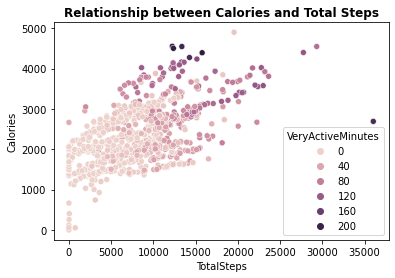

In [239]:
sb.scatterplot(data=dailyactivities,y='Calories',x='TotalSteps',hue='VeryActiveMinutes')
plt.title('Relationship between Calories and Total Steps',fontweight = 'bold')

The relationship between the total steps and calories is a positive correlation hence when the steps increase the calories lost increases but it should also be noted that to lose a high amount of calories (> 4000 calories) the user must have at least 120 very active minutes.

Hence, the calories can be used as a measure of activity

<a id='9'></a> 
#### Which day of the week are users the most active?

In [138]:
day = pd.to_datetime(dailycalories.ActivityDay).dt.day_name()
dailycalories['day'] = day
dailycalories.head()

,Id,ActivityDay,Calories,day
0,1503960366,4/12/2016,1985,Tuesday
1,1503960366,4/13/2016,1797,Wednesday
2,1503960366,4/14/2016,1776,Thursday
3,1503960366,4/15/2016,1745,Friday
4,1503960366,4/16/2016,1863,Saturday


Text(0.5, 1.0, 'Daily Calories Count')

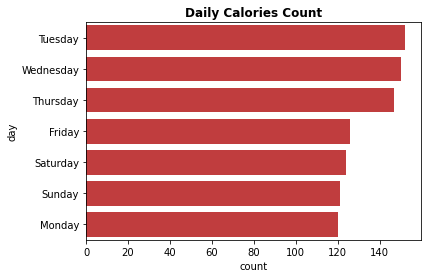

In [237]:
base_color=sb.color_palette()[3]
orders = dailycalories.day.value_counts().index
sb.countplot(y='day',data = dailycalories,color = base_color ,order = orders)
plt.title('Daily Calories Count',fontweight = 'bold')

Tuesday is the most active day for users 

<a id='10'></a> 
#### How do users spend their time?

since we don't have any demographic variables from our sample we want to determine the type of users with the data we have. We can classify the users by activity considering the daily amount of steps. We can categorize users as follows:

   -  Sedentary - Less than 5000 steps a day.
   - Lightly active - Between 5000 and 7499 steps a day.
   - Fairly active - Between 7500 and 9999 steps a day.
   - Very active - More than 10000 steps a day.
   
Classification has been made per the following article https://www.10000steps.org.au/articles/counting-steps/

In [202]:
dailyintensity['TotalActiveMinutes']=dailyintensity['LightlyActiveMinutes']+dailyintensity['FairlyActiveMinutes']+dailyintensity['VeryActiveMinutes']+dailyintensity['SedentaryMinutes']
avg_total = dailyintensity['TotalActiveMinutes'].mean()
percent_lightly =(dailyintensity['LightlyActiveMinutes'].mean()/avg_total)*100
percent_fairly = (dailyintensity['FairlyActiveMinutes'].mean()/avg_total)*100
percent_very = (dailyintensity['VeryActiveMinutes'].mean()/avg_total)*100
percent_sedentary=(dailyintensity['SedentaryMinutes'].mean()/avg_total)*100
percent_lightly, percent_fairly,percent_very,percent_sedentary

(15.820493214202166, 1.1130139975629088, 1.7366021081886969, 81.32989068004623)

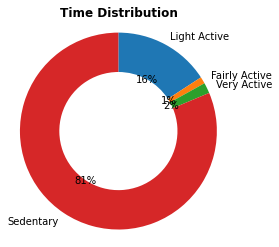

In [248]:
my_data = [15.820493214202166, 1.1130139975629088, 1.7366021081886969, 81.32989068004623]
my_labels = 'Light Active', 'Fairly Active', 'Very Active','Sedentary'
plt.pie(my_data, labels=my_labels,autopct='%1.0f%%',startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Time Distribution',fontweight = 'bold')
plt.axis('square')
plt.show()


Based on the donut chart,81% of the time Bellabeat users are sedentary (projected to take less than 5000 steps a day)while only 2% of the time Bellabeat users are very active(projected to take more than 10000 steps a day)

<a id='11'></a> 
#### Which BMI class covers the most distance and steps?

In [226]:
weightloginfo=weightlog[['Id','Date','BMI']]
left = weightloginfo.set_index(['Id','Date'])
right = dailyactivities.set_index(['Id','ActivityDate'])
n=left.join(right)
stepswithBMI=n.reset_index()[["Id","ActivityDate","BMI","TotalDistance"]].dropna(subset=['TotalDistance'])
Healthy=stepswithBMI.loc[(stepswithBMI.BMI >= 18.5) & (stepswithBMI.BMI <= 24.9)].TotalDistance.mean()
Overweight=stepswithBMI.loc[(stepswithBMI.BMI > 24.9) & (stepswithBMI.BMI <= 29.9)].TotalDistance.mean()
Obesity=stepswithBMI.loc[(stepswithBMI.BMI > 30)].TotalDistance.mean()
output=pd.DataFrame({'Healthy': [Healthy], 'Overweight': [Overweight],'Obesity':[Obesity]})
output.to_csv("C:\\Users\\HP\\Downloads\\average_distance_with_BMI.csv")


In [245]:
stepswithBMI.BMI.describe()

count    2076.000000
mean       25.183868
std         3.044828
min        21.450001
25%        23.959999
50%        24.389999
75%        25.559999
max        47.540001
Name: BMI, dtype: float64

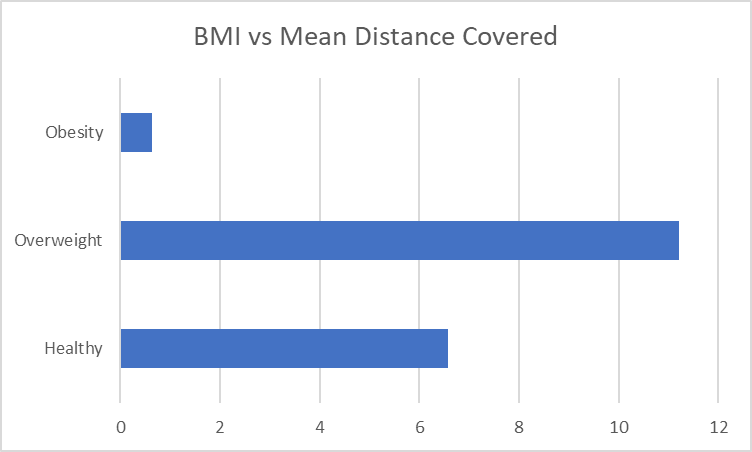

In [229]:
weightloginfo=weightlog[['Id','Date','BMI']]
left = weightloginfo.set_index(['Id','Date'])
right = dailyactivities.set_index(['Id','ActivityDate'])
n=left.join(right)
stepswithBMI=n.reset_index()[["Id","ActivityDate","BMI","TotalSteps"]].dropna(subset=['TotalSteps'])
Healthy=stepswithBMI.loc[(stepswithBMI.BMI >= 18.5) & (stepswithBMI.BMI <= 24.9)].TotalSteps.mean()
Overweight=stepswithBMI.loc[(stepswithBMI.BMI > 24.9) & (stepswithBMI.BMI <= 29.9)].TotalSteps.mean()
Obesity=stepswithBMI.loc[(stepswithBMI.BMI > 30)].TotalSteps.mean()
result=pd.DataFrame({'Healthy': [Healthy], 'Overweight': [Overweight],'Obesity':[Obesity]})
result.to_csv("C:\\Users\\HP\\Downloads\\average_steps_with_BMI.csv")


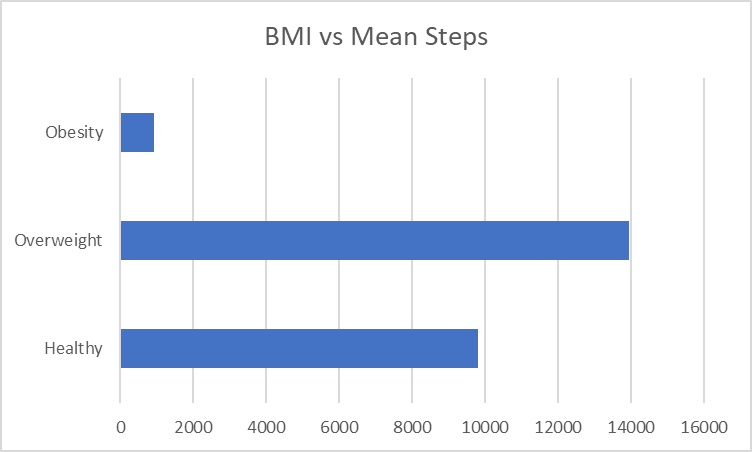

The above visualisation shows the BMI class against the average steps and shows that the users who were overweight have taken the most steps(~14000 steps) but the ones who are obesed have taken by far the least steps(<2000 steps)as expected

<a id='12'></a> 
## Insights for Marketing Strategy
Following data driven decisions can be helpful for marketing team:

 - From the Time Used to Get Up viz, we can see that the users of Bellabeat products are active early in the morning as they dont spend too much time on the bed after waking up which is generally a good habit for proactiveness  So, we can convince the non-user that, to build up her good sleeping habit, Bellabeat's product will be good choice.
 - From the Daily Activity Viz, it can be observed that the heart rate of the user is maintained within the standard 60-100 bpm indicating the usefulness of Bellabeat products in maintaining heart rate and exercise.
 - It's a good trend to consume calories at week days same as weekend at Daily Calories Count graph. So, when a user will be so busy in her daily activities, bellabeat products help her to burn calories.
 - It can also be seen from the Relationship between Calories and Total Steps plot that the users with very active minutes( greater than 120 minutes) tend to derive the best results in terms of burnt calories from their Bellabeat products.
 - From the Activity Distribution viz, we can clearly see that a massive 81% of the time our users are projected to take less than 5000 steps a day which isn't ideal while only 2% of the time our users meet the recommended number of steps according to https://www.nbcnews.com/health/health-news/how-many-steps-day-should-you-take-study-finds-7-n1278853 which is quite substantial.
 - From https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html , we know that the ideal BMI range for an adult is 18.5-24.9. When BMI is between 25-29.9, that indicates overweight while the BMI greater than 30 indicates obesity. In our BMI vs Mean distance Viz and the BMI vs Mean Steps viz, we can clearly see that overweight women are more willing to lose their weight by walking more distance and taking more steps. So, women who are fatty, they can use Bellabeat products to be slim.


<a id='13'></a>
## Conclusion
These are the recommended steps of action to take to improve the Bellabeat user experience:
- Introduction of Target Steps
- Daily notifications to remind users to take their targeted steps per day
- Reward like coupons for exceeding a projected amount of steps per day
- Step plans for attaining a specific calories burnt